In [24]:
!pip install  fastbook fastai timm

In [25]:
from fastbook import *
from fastai.vision.widgets import *
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.utils import Image
import timm
def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

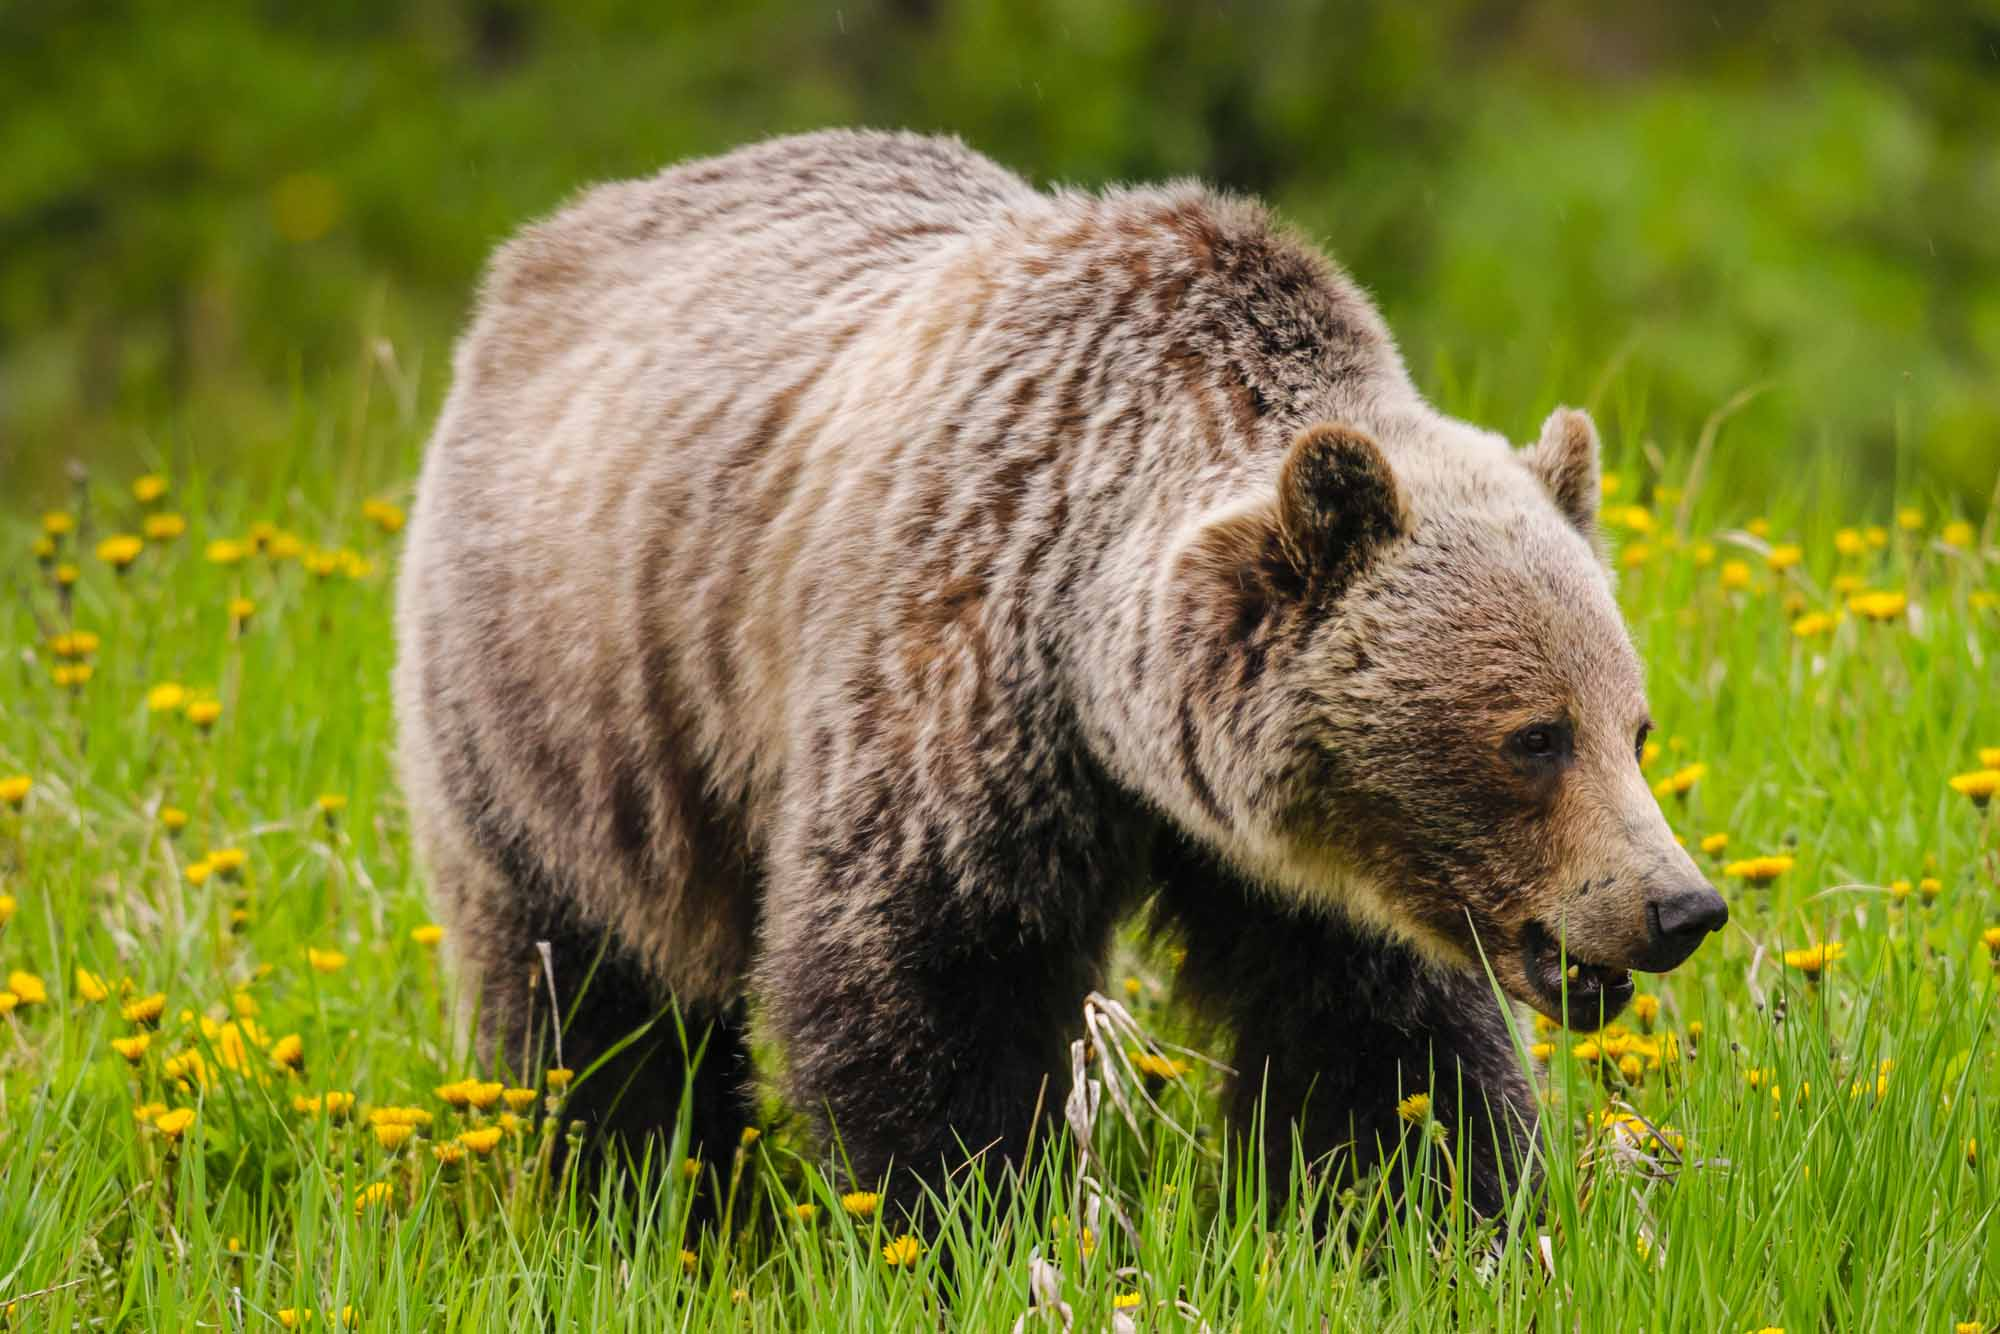

In [4]:
#hide
dest = './images/grizzly_bear.jpg'
download_url(dest=dest,url=search_images("grizzly bear",max_images=1)[0],)
bear = Image.open(dest)
bear.to_thumb(256,256)  
bear.show()

In [20]:
bear_types = ('grizzly','black','teddy',)
for bear in bear_types:
  dest = f'./images/{bear}/'
  download_images(dest=dest,urls=search_images(f'{bear} bear'))
  

In [4]:
from typing import List
path=Path('./images')
paths = get_image_files(path)
invalid_images: List[Path] = verify_images(paths)
for failed in invalid_images:
  failed.unlink()

In [8]:
bears_dblock = DataBlock(blocks=(ImageBlock,CategoryBlock),get_items=get_image_files,splitter=RandomSplitter(.2,seed=1),get_y=parent_label,item_tfms=Resize(128))

bears_dblock = bears_dblock.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears_dblock.dataloaders(path)

/home/prinzz/main/my-projects/fastai/virtual-env/lib/python3.12/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


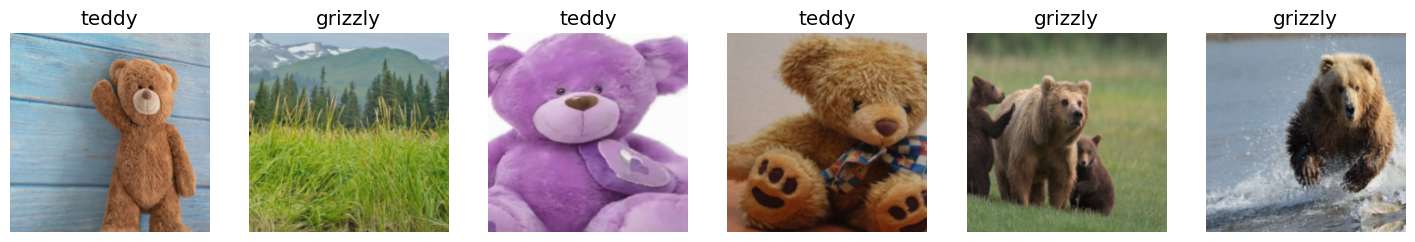

In [9]:
dls.train.show_batch(max_n=6,nrows=1)


In [33]:
from timm import *
learn = vision_learner(dls,'convnextv2_small', metrics=error_rate)
learn.fine_tune(10)

NameError: name 'timm' is not defined

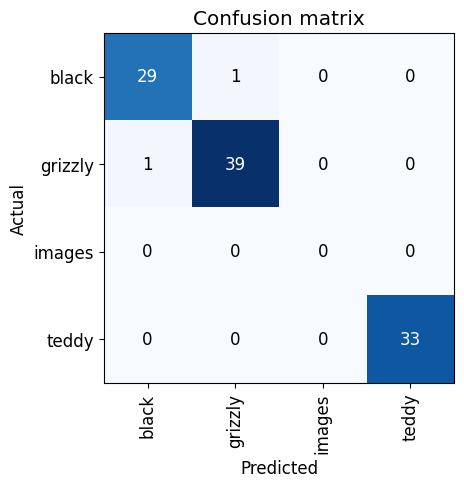

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

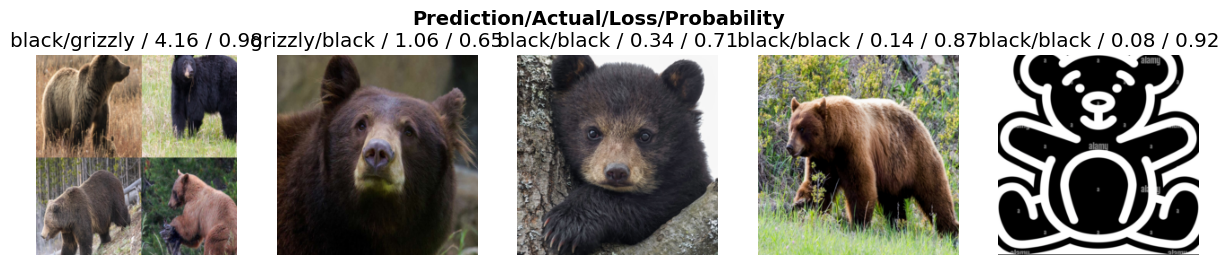

In [13]:

interp.plot_top_losses(5, nrows=1)

In [14]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/prinzz/main/my-projects/fastai/virtual-env/lib/python3.12/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/prinzz/main/my-projects/fastai/virtual-env/lib/python3.12/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
     

FileNotFoundError: [Errno 2] No such file or directory: 'images/black/76d0416d-a04c-4589-b821-cb6f3d069d05.jpg'